In [1]:
from utils import RealDescription, LoveNumbersHyperParameters, load_base_model, parameters_path, Earth_radius, Integration
from numpy import Inf

Love_numbers_hyper_parameters: LoveNumbersHyperParameters = load_base_model(
    name="Love_numbers_hyper_parameters", path=parameters_path, base_model_type=LoveNumbersHyperParameters
)
Love_numbers_hyper_parameters.load()
real_description = RealDescription(
    below_ICB_layers=None,
    below_CMB_layers=None,
    splines_degree=1,
    radius_unit=Earth_radius,
    real_crust=False,
    n_splines_base=4,
    profile_precision=100,
    radius=Earth_radius,
    load_description=False,
)

integration = Integration(real_description=real_description, log_omega=Inf, use_attenuation=False, use_anelasticity=False)
elastic_Love_numbers = integration.y_system_integration(
    n=2, hyper_parameters=Love_numbers_hyper_parameters.y_system_hyper_parameters
)

In [2]:
from numpy import array

elastic = array([[elastic_Love_numbers], [elastic_Love_numbers]])

In [3]:
from utils import Result

elastic_result = Result(hyper_parameters=Love_numbers_hyper_parameters)
elastic_result.update_values_from_array(result_array=elastic, degrees=[1, 2])
elastic_result.values

{<Direction.radial: 1>: {<BoundaryCondition.load: 1>: array([[-0.9911582+0.j],
         [-0.9911582+0.j]]),
  <BoundaryCondition.shear: 2>: array([[0.06054103+0.j],
         [0.06054103+0.j]]),
  <BoundaryCondition.potential: 3>: array([[0.60322341+0.j],
         [0.60322341+0.j]])},
 <Direction.tangential: 2>: {<BoundaryCondition.load: 1>: array([[0.02333265+0.j],
         [0.04666529+0.j]]),
  <BoundaryCondition.shear: 2>: array([[0.31694241+0.j],
         [0.63388481+0.j]]),
  <BoundaryCondition.potential: 3>: array([[0.08387368+0.j],
         [0.16774735+0.j]])},
 <Direction.potential: 3>: {<BoundaryCondition.load: 1>: array([[-0.3052411 +0.j],
         [-0.61048221+0.j]]),
  <BoundaryCondition.shear: 2>: array([[0.08387368+0.j],
         [0.16774735+0.j]]),
  <BoundaryCondition.potential: 3>: array([[0.2979823+0.j],
         [0.5959646+0.j]])}}

In [4]:
from utils import Result, results_path, load_base_model, frequencies_to_periods

use_attenuation = True
use_anelasticity = False
path = results_path.joinpath("3375-c3d6-ddb6-2967")
sub_path = path.joinpath("runs").joinpath("anelasticity_" + str(use_anelasticity) + "__attenuation_" + str(use_attenuation))
anelastic_Love_numbers = Result()
anelastic_Love_numbers.load(name="anelastic_Love_numbers", path=sub_path)
omega_values = load_base_model(name="frequencies", path=sub_path)
T_values = frequencies_to_periods(frequencies=omega_values)
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [5]:
from utils import Direction, BoundaryCondition

anelastic_values = anelastic_Love_numbers.values[Direction.potential][BoundaryCondition.potential][1]

In [14]:
from scipy import interpolate

f = interpolate.interp1d(x=T_values, y=anelastic_values, kind="linear")
f(18.6) / 2.0

(0.3604781137316679-0.03197990748660527j)

/home/mrousselet/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/mrousselet/.local/lib/python3.10/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


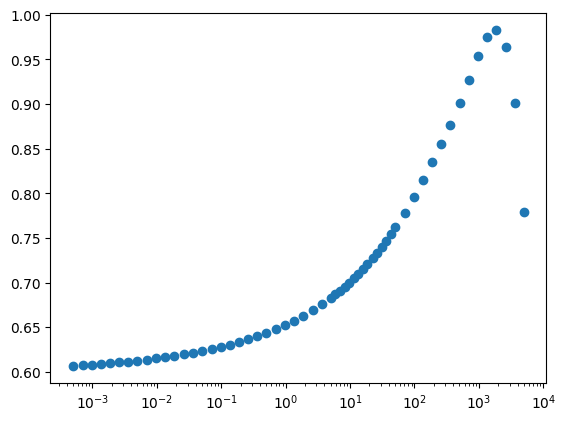

In [7]:
import matplotlib.pyplot as plt

plt.scatter(T_values, anelastic_values)
plt.xscale("log")

In [13]:
elastic_Love_numbers = Result()
elastic_Love_numbers.load(name="elastic_Love_numbers", path=path)
elastic_value = elastic_Love_numbers.values[Direction.potential][BoundaryCondition.potential][1]
elastic_value / 2.0

array([0.2979823+0.j])